In [30]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import clear_output

In [66]:
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('analysis/{}.png'.format(fig_id), format='png', dpi=300)

In [15]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/first_graph_node_attributes.gpickle')

# Prime misure generali
## Numero di nodi e link

In [16]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))

Number of nodes:	10577
Number of links:	2865239


## Grado medio e densità

In [17]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))

Average degree:	541.7867070057672
Density:	0.051227941282693576


# Analisi della distribuzione del grado

In [35]:
std_dev =np.std(degrees_list)
median = np.median(degrees_list)
minimum=np.min(degrees_list)
maximum=np.max(degrees_list)
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(std_dev))
print('Median:\t\t\t{}'.format(median))
print('Minimum:\t\t{}'.format(minimum))
print('Maximum:\t\t{}'.format(maximum))

Average degree:		541.7867070057672
Standard deviation:	784.2755949483075
Median:			142.0
Minimum:		1
Maximum:		3738


## ECDF - loglog scale

Saving figure ecdf
Saving figure eccdf


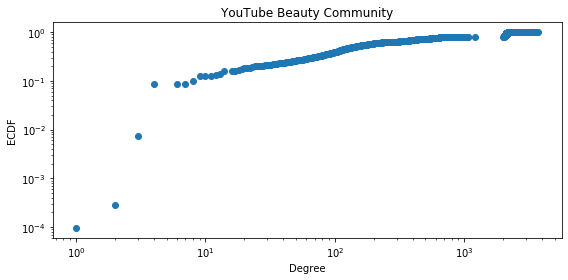

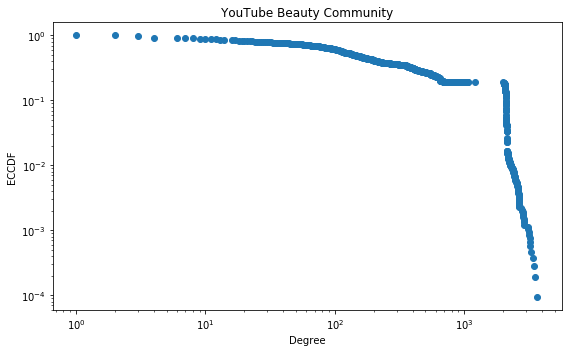

In [67]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)

y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF')
axes.set_xlabel('Degree')
plt.title('YouTube Beauty Community')

save_fig('ecdf')

y = 1-ecdf(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community')

save_fig('eccdf')

## Confronto con rete equivalente E-R

In [20]:
p = density

### Faccio la media di più reti random

In [32]:
er_avgs = []
er_stds = []
er_medians = []
er_mins = []
er_maxs = []

In [39]:
for i in range(10):
    print('{}/10'.format(i))
    clear_output(wait=True)
    random_graph = nx.fast_gnp_random_graph(n_nodes,p)
    er_degrees_dict = dict(random_graph.degree()).values()
    er_degrees_list = list(er_degrees_dict)
    er_avgs.append(np.mean(er_degrees_list))
    er_stds.append(np.std(er_degrees_list))
    er_medians.append(np.median(er_degrees_list))
    er_mins.append(np.min(er_degrees_list))
    er_maxs.append(np.max(er_degrees_list))

9/10


In [40]:
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()

pd_rows=[]

er_avg_degree = np.mean(er_avgs)
er_density = nx.density(random_graph)
er_std_dev = np.mean(er_stds)
er_median = np.mean(er_medians)
er_minimum = np.mean(er_mins)
er_maximum = np.mean(er_maxs)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df_networks_comparison = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
print('NETWORKS COMPARISON')
print(df_networks_comparison)

NETWORKS COMPARISON
                 Metric name  Real network  Random network
0            Number of nodes  1.057700e+04    1.057700e+04
1            Number of links  2.865239e+06    2.867200e+06
2                    Density  5.122794e-02    5.126300e-02
3             Average degree  5.417867e+02    5.417993e+02
4  Degree standard deviation  7.842756e+02    2.266931e+01
5              Median degree  1.420000e+02    5.417500e+02
6             Minimum degree  1.000000e+00    4.564000e+02
7             Maximum degree  3.738000e+03    6.301000e+02


In [41]:
df_networks_comparison.to_csv('analysis/df_networks_comparison.csv')

                 Metric name  Real network  Random network
0            Number of nodes  1.057700e+04    1.057700e+04
1            Number of links  2.865239e+06    2.866882e+06
2                    Density  5.122794e-02    5.125732e-02
3             Average degree  5.417867e+02    5.420974e+02
4  Degree standard deviation  7.842756e+02    2.246272e+01
5              Median degree  1.420000e+02    5.420000e+02
6             Minimum degree  1.000000e+00    4.570000e+02
7             Maximum degree  3.738000e+03    6.320000e+02
Saving figure YouTube Beauty Community vs Erdos-Renyi


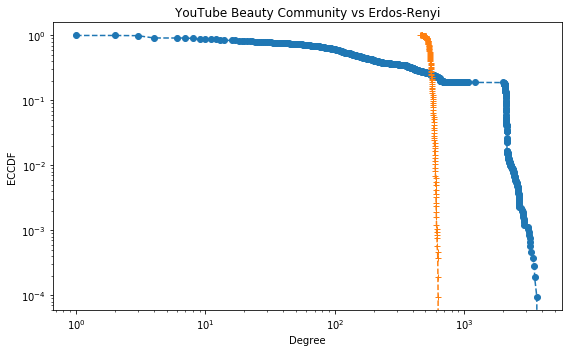

In [68]:
pd_rows=[]

random_graph = nx.fast_gnp_random_graph(n_nodes,p)
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()
er_degrees_dict = dict(random_graph.degree()).values()
er_degrees_list = list(er_degrees_dict)
er_avg_degree = np.mean(er_degrees_list)
er_density = nx.density(random_graph)
er_std_dev = np.std(er_degrees_list)
er_median = np.median(er_degrees_list)
er_minimum = np.min(er_degrees_list)
er_maximum = np.max(er_degrees_list)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
print(df)

ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = 1-ecdf(x)
er_ecdf = ECDF(er_degrees_list)
er_x = np.unique(er_degrees_list)
er_y = 1-er_ecdf(er_x)

fig_ecdf_youtube = plt.figure(figsize=(8,5))
axes = fig_ecdf_youtube.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='--')
axes.loglog(er_x,er_y,marker = '+', ms = 6, linestyle='--')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community vs Erdos-Renyi')

save_fig('YouTube Beauty Community vs Erdos-Renyi')

# Hubs

In [43]:
percentile_99 = np.percentile(degrees_list,99)
print(percentile_99)

2275.399999999998


In [54]:
hub_nodi = [k for k,v in dict(first_graph.degree()).items() if v>= percentile_99]
print(hub_nodi)

['Samii B', 'Lovely Reveral', 'PatrickStarrr', 'luisjana nerhati', 'Tmac1963', 'V M', 'iluvsarahii', 'Alex', 'C M', 'Jackie Aina', 'Meagan Newton', 'TheBeautyInMe3TV VLOGS', 'Olivia Miranda', 'Chris Caldwell', 'Irene Khan (irenesarah)', 'Symphani Soto', 'Relle Tolentino', 'Jennifer Jankins', 'Sarah', 'Janvier Balser', 'Dee Luther', 'babygrils1000', 'jesusluvsfreaks', 'Crystal Zaragoza', 'xotifffy !', 'Candy Feyrer', 'A. A.', 'Karina Orantes Flies', 'Sazan Hendrix', 'RawBeautyKristi', 'anna johnson', 'J K', 'Olive Rose', 'Shameless Maya', 'SydneyLoves Makeup', 'Amanda Clark', 'A A', 'Ornella Bettio', 'Raél Iman', '사랑해조안누나', 'Bathesheba Beautiful', 'Mesha G', 'Alex Green', 'Janee Lytch', 'Graceful Knots', 'Taylor Elizabeth', 'Janelle Crosbourne', 'Princessa G', 'Jade Moreno', 'Katie Goodrick', 'CassieMarie IsMe', 'Girl Trucker', 'Luhhsetty', 'Darrell Bowman', 'Lady VIP', 'Steph L Southern', 'klk1900', 'Sam', 'mellow2019', 'mary merkaj', 'Jordan Fields', 'Keira C', 'Im_a_prø_at_Imperfecti

In [64]:
np.save('analysis/hubs.npy',hub_nodi)

# Transitività

In [56]:
avg_clustering_coeff = nx.average_clustering(first_graph)

In [57]:
transitivity = nx.transitivity(first_graph)

In [58]:
clustering=nx.clustering(first_graph)

In [60]:
print('Transitivity:{}'.format(transitivity))
print('avg_clustering_coeff:{}'.format(avg_clustering_coeff))
print('clustering:{}'.format(clustering))

Transitivity:0.8829776384185349
avg_clustering_coeff:0.8036558385387247
clustering:{'Amber Radtke': 0.6711970851910446, 'SOAP ASMR': 0.9638392257023793, 'Zoe Quinn': 0.92306047104223, 'Hoo Me': 1.0, 'josue': 0.5719781845854649, 'MELISSA RIVERA': 0.5454545454545454, 'Jennifer Lumbra': 1.0, 'Samii B': 0.7144865971821047, 'Southeast by Midwest': 0.719193427931292, 'karinalaramartinez': 0.8859357696566998, 'drcoxhugenews': 0.7186147186147186, 'Darko': 0.7304439746300211, 'Minnie Fonder': 0.886492925250592, 'jason williams': 0.8884131631648171, 'Feed Your Inner .Chef': 1.0, 'Aasyah Soloman': 0.8243466013668155, 'Art Lady': 1.0, 'Carmz Rey': 1.0, 'Miss Goldie': 0.7629807692307692, 'Helena Cox': 0.7461660497091486, 'Souhab uddin': 0.8875103391232424, 'Becki Worden': 0.532399886542379, 'Halie Malicoat': 0.6120828538550057, 'Melanie gorniak': 0.8527760983814747, 'Faelle Bien-Aimé': 0.8204981300230764, 'Alyssalovvee': 1.0, 'Katy': 0.33723838357246283, 'Darcel Vickaryous': 0.689900426742532, 'Ina

In [61]:
pd_rows=[]
pd_rows.append(('Number of nodes',n_nodes))
pd_rows.append(('Number of links',n_links))
pd_rows.append(('Density',density))
pd_rows.append(('Average degree',avg_degree))
pd_rows.append(('Degree standard deviation',std_dev))
pd_rows.append(('Median degree',median))
pd_rows.append(('Minimum degree',minimum))
pd_rows.append(('Maximum degree',maximum))
pd_rows.append(('Global clustering',transitivity))
pd_rows.append(('Average local clustering',avg_clustering_coeff))

df_metrics_values = pd.DataFrame(pd_rows, columns=['Metric name','Value'])
df_metrics_values.to_csv('analysis/df_metrics_values.csv')

In [65]:
np.save('analysis/clustering.npy',clustering)